In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IMDB-Movie-Data.csv')

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 74.3+ KB


In [6]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [7]:
df.shape

(1000, 12)

In [8]:
df = df.loc[:,['Title','Genre','Rating','Votes']]

In [9]:
df

,Title,Genre,Rating,Votes
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1,757074
1,Prometheus,"Adventure,Mystery,Sci-Fi",7.0,485820
2,Split,"Horror,Thriller",7.3,157606
3,Sing,"Animation,Comedy,Family",7.2,60545
4,Suicide Squad,"Action,Adventure,Fantasy",6.2,393727
...,...,...,...,...
995,Secret in Their Eyes,"Crime,Drama,Mystery",6.2,27585
996,Hostel: Part II,Horror,5.5,73152
997,Step Up 2: The Streets,"Drama,Music,Romance",6.2,70699
998,Search Party,"Adventure,Comedy",5.6,4881


# K-Means Clustering

In [10]:
x = df.iloc[:,2:4].values

In [11]:
x

array([[8.10000e+00, 7.57074e+05],
       [7.00000e+00, 4.85820e+05],
       [7.30000e+00, 1.57606e+05],
       ...,
       [6.20000e+00, 7.06990e+04],
       [5.60000e+00, 4.88100e+03],
       [5.30000e+00, 1.24350e+04]])

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[:,0:2]=sc.fit_transform(x[:,0:2])

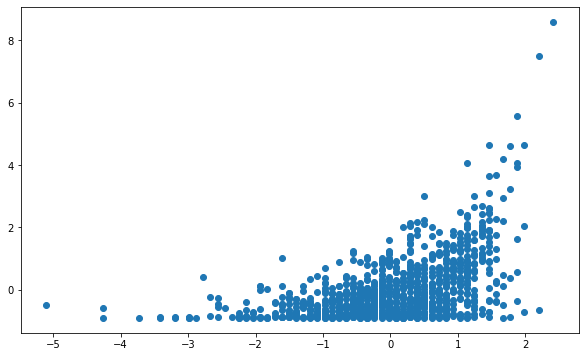

In [13]:
plt.figure(figsize = (10,6))
plt.scatter(x[:,0],x[:,1])

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i,init='k-means++')
    k_means.fit(x[:,0:2])
    wcss.append(k_means.inertia_)
print(wcss)

[1999.9999999999998, 1124.0464749519122, 720.0235452091246, 566.4696761066089, 436.00806138071215, 353.7092042204955, 299.4661962055984, 254.84876682066573, 228.6804437632566, 205.15350866972744]


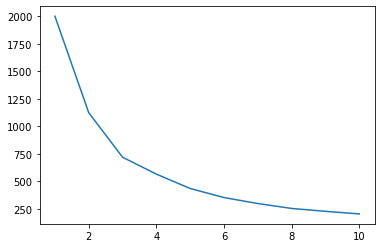

In [15]:
x_range = range(1,11)
plt.plot(x_range,wcss)

In [16]:
k_means = KMeans(n_clusters = 4,init='k-means++')
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
y_kmeans = k_means.predict(x)

In [18]:
y_kmeans

array([3, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 3, 2, 1, 1, 0, 1, 0, 1,
       0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 0, 3, 2,
       1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 3, 3, 2, 0, 3, 1, 3, 2, 2, 2, 0, 3,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 3, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 1, 3, 1, 0, 1, 1, 2, 1, 0,
       1, 2, 2, 1, 2, 2, 3, 1, 2, 0, 2, 2, 3, 1, 1, 2, 2, 0, 1, 2, 0, 2,
       1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 1, 1, 3, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2,
       0, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1,
       0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1,

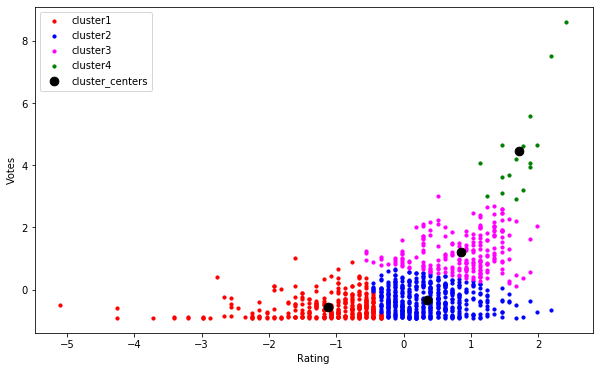

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=10,c='red',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=10,c='blue',label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=10,c='magenta',label='cluster3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=10,c='green',label='cluster4')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=75,c='black',label='cluster_centers')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.legend()
plt.show()

# K Nearest Neighbors

In [20]:
movie_features = pd.concat([df["Genre"].str.get_dummies(sep=","),df[["Rating"]]],axis=1)


In [21]:
movie_features.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Rating
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8.1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,7.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7.3
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7.2
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6.2


In [22]:
movie_features.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'Rating'],
      dtype='object')

In [23]:
'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
movie_features = sc.fit_transform(movie_features)'''

'from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nmovie_features = sc.fit_transform(movie_features)'

In [24]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10)
knn.fit(movie_features)
distances, indices = knn.kneighbors(movie_features)

In [25]:
indices

array([[  0,  67, 162, ...,  35, 362, 205],
       [  1, 121, 156, ..., 497, 195,  48],
       [  2, 382, 675, ..., 282, 328, 812],
       ...,
       [997, 744, 591, ..., 295, 665, 738],
       [998, 409, 985, ..., 217, 397, 296],
       [999, 594, 141, ..., 106, 740, 397]], dtype=int32)

In [26]:
def get_index_from_Title(Title):
    return list(df[df["Title"]==Title].index)[0]
all_movie_names = (df.Title.values)

def Recommendations(query=None):
    found_id = get_index_from_Title(query)
    for i in indices[found_id][1:]:
        print(df.loc[i]["Title"])

In [27]:
Recommendations('The Perks of Being a Wallflower')

The Fault in Our Stars
La vie d'Adèle
Dear Zindagi
Seven Pounds
Brooklyn
Jane Eyre
Up in the Air
Blue Valentine
Me Before You


In [28]:
Recommendations('Guardians of the Galaxy')

Mad Max: Fury Road
X-Men: Days of Future Past
Star Trek
Iron Man
Edge of Tomorrow
Rogue One
Captain America: Civil War
Star Trek Into Darkness
X: First Class


In [29]:
Recommendations('Suicide Squad')

Indiana Jones and the Kingdom of the Crystal Skull
The Great Wall
The Last Witch Hunter
Prince of Persia: The Sands of Time
Underworld: Rise of the Lycans
Clash of the Titans
Underworld: Blood Wars
Wrath of the Titans
Pirates of the Caribbean: On Stranger Tides
